In [1]:
# フォントを全て読み込み
import matplotlib.pyplot as plt
import japanize_matplotlib

fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = "MS Gothic"

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D #3Dコレクションの追加 
from matplotlib import cm #cm:カラーマップの提供 

In [3]:
end="2022/12/31"
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16",end).dropna()
rn225=n225.pct_change().dropna()

In [4]:
def plot3Dsurface(tsd,days,title):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(projection='3d')
    bins = np.arange(-0.3, 0.3, 0.02)#max(tsd),min(tsd),width 瓶の設定
    xyz=[] #頻度の格納容器  
    for i in range(1,241):
        tmp=np.array(tsd.pct_change(i).dropna())
        n, bin0, rectangles = ax.hist(tmp, bins,density=True)#n:頻度;bin0:bins
        xyz.append([])
        for j in range(len(bins)-1):
            xyz[i-1].append(n[j])
    xyz=np.array(xyz)
    Y = np.arange(0, len(n), 1)
    X = np.arange(0, 241-1, 1)
    X, Y = np.meshgrid(X, Y)
    Z = xyz[X,Y]
    ax.plot_surface(X, Y, Z, rstride=2, cstride=10, cmap=cm.YlGn,
                       linewidth=10, antialiased=True)
    plt.yticks([0,int(len(bins)/2),len(bins)],[-0.3,0,0.3])
    ax.set_title(title)
    ax.set_xlabel('単位時間',size = 10)
    ax.set_ylabel('変化率',size = 10)
    ax.set_zlabel('頻度',size = 10)
    #plt.savefig(title[:4]+'.jpeg',dpi=600)
    plt.show()

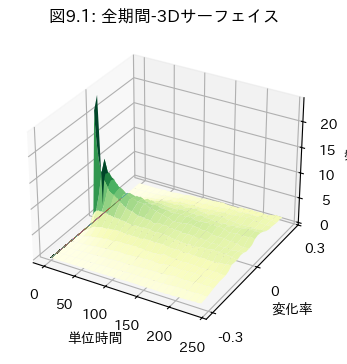

In [5]:
plot3Dsurface(n225,10,"図9.1: 全期間-3Dサーフェイス")

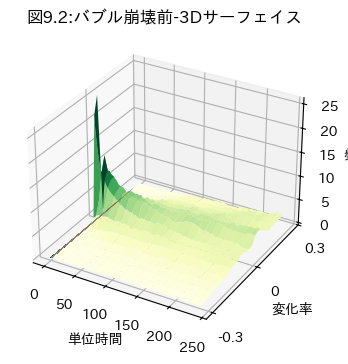

In [6]:
plot3Dsurface(n225.loc[:"1989/12/31"],10,"図9.2:バブル崩壊前-3Dサーフェイス")

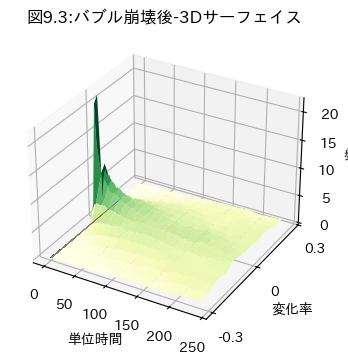

In [7]:
plot3Dsurface(n225.loc["1990/1/1":],10,"図9.3:バブル崩壊後-3Dサーフェイス")

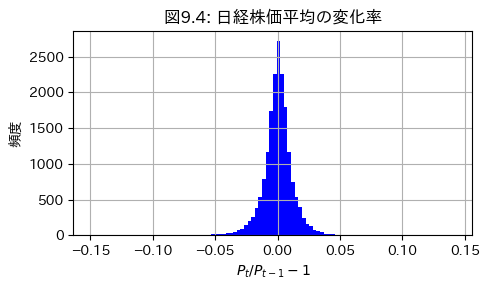

In [8]:
rn225.hist(bins=100,color='blue',figsize=(5,3))
plt.xlabel('$P_{t}/P_{t-1}-1$')
plt.ylabel('頻度')
plt.title("図9.4: 日経株価平均の変化率")
plt.tight_layout()
plt.show()

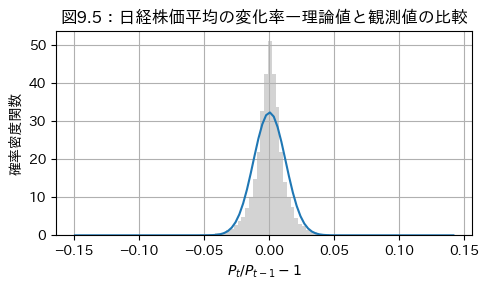

In [9]:
def hist_norm(tsd,title):
    x=np.linspace(tsd.min(),tsd.max(),100)
    pdf=norm.pdf(x,tsd.mean(),tsd.std())
    tsd.hist(bins=100,color='lightgray',density=True,figsize=(5,3))
    plt.plot(x,pdf)
    plt.xlabel('$P_{t}/P_{t-1}-1$')
    plt.ylabel('確率密度関数')
    plt.title(title)
    plt.tight_layout()
    #plt.savefig(title[:4]+".jpeg",dpi=600)
    plt.show()
hist_norm(rn225,"図9.5：日経株価平均の変化率ー理論値と観測値の比較")

In [10]:
def descriptive_stats(tsd):

    # tsd が DataFrame なら 1 列目を Series にする
    if isinstance(tsd, pd.DataFrame):
        s = tsd.iloc[:, 0]
    else:  # すでに Series の場合
        s = tsd
    stats = [s.mean(), s.std(), s.skew(), s.kurt()]
    name =[x for x in globals() if globals()[x] is tsd][0]
    return pd.DataFrame([stats],index=[name],columns=["平均",
                                                "標準偏差","歪度","尖度(0)"])

descriptive_stats(rn225)

,平均,標準偏差,歪度,尖度(0)
rn225,0.000349,0.012325,-0.128314,9.159178


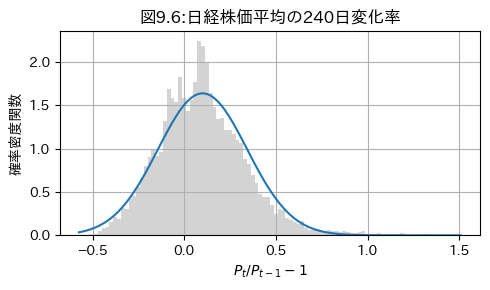

In [11]:
r240n225=n225.pct_change(240).dropna()
hist_norm(r240n225,"図9.6:日経株価平均の240日変化率")

In [12]:
descriptive_stats(r240n225)

,平均,標準偏差,歪度,尖度(0)
r240n225,0.099553,0.243093,0.805638,2.002695


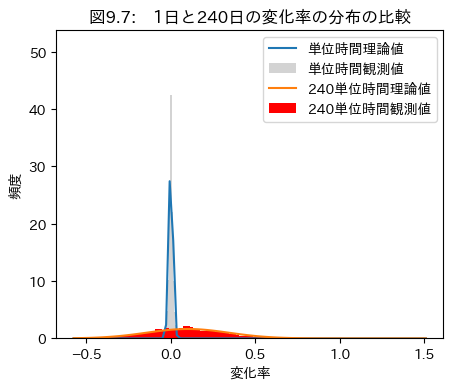

In [13]:
fig = plt.figure(figsize=(5,4))
x=np.linspace(r240n225.min(),r240n225.max(),100)
plt.plot(x,norm.pdf(x,rn225.mean(),rn225.std()),label='単位時間理論値')
plt.hist(rn225,bins=100,color='lightgray',density=True,label='単位時間観測値')
plt.plot(x,norm.pdf(x,r240n225.mean(),r240n225.std())\
         ,label='240単位時間理論値')
plt.hist(r240n225,bins=100,color='red',density=True,label='240単位時間観測値')
plt.title("図9.7:　1日と240日の変化率の分布の比較")
plt.legend()
plt.xlabel("変化率")
plt.ylabel("頻度")
plt.show()

In [14]:
def double_hist(tsd1,xlabel1,title1,tsd2,xlabel2,title2):
    plt.figure(figsize=(7,3))
    ax=plt.subplot(1,2,1)
    tsd1.hist(ax=ax,bins=100,color='blue',density=True)
    plt.title(title1)
    plt.xlabel(xlabel1)
    plt.ylabel('確率密度関数')
    ax2=plt.subplot(1,2,2)
    tsd2.hist(ax=ax2,bins=100,color='blue',density=True)
    plt.title(title2)
    plt.xlabel(xlabel2)
    plt.ylabel('確率密度関数')
    plt.tight_layout()
    #plt.savefig(title1[:5]+".jpeg",dpi=600)
    plt.show()

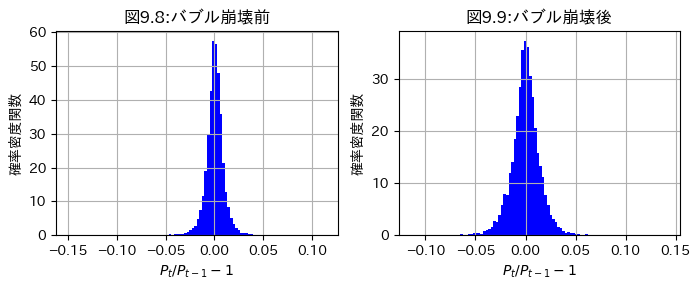

In [15]:
before=rn225.loc[:'1989/12/31']
after=rn225.loc['1990/1/1':]
double_hist(before,'$P_{t}/P_{t-1}-1$',"図9.8:バブル崩壊前",
            after,'$P_{t}/P_{t-1}-1$',"図9.9:バブル崩壊後")

In [16]:
a=descriptive_stats(before)
b=descriptive_stats(after)
print('表9.1: バブル崩壊を起点とした日次基本統計量の比較')
pd.concat([a,b],axis=0)

表9.1: バブル崩壊を起点とした日次基本統計量の比較


,平均,標準偏差,歪度,尖度(0)
before,0.000578,0.009871,-0.444663,15.468247
after,0.000061,0.014844,0.031190,5.521895


In [17]:
before240tw=r240n225.loc[:'1989/12/31']
a=descriptive_stats(before240tw)
after240tw=r240n225.loc['1990/1/1':]
b=descriptive_stats(after240tw)
print('表9.2: バブル崩壊を起点とした240日基本統計量の比較')
pd.concat([a,b],axis=0)

表9.2: バブル崩壊を起点とした240日基本統計量の比較


,平均,標準偏差,歪度,尖度(0)
before240tw,0.166760,0.240380,1.123265,2.886217
after240tw,0.016936,0.219851,0.420939,0.056076


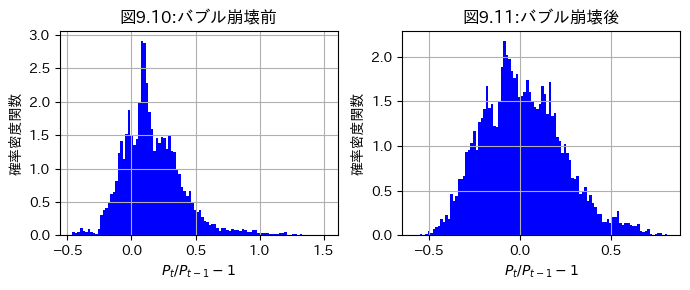

In [18]:
double_hist(before240tw,'$P_{t}/P_{t-1}-1$',"図9.10:バブル崩壊前",
            after240tw,'$P_{t}/P_{t-1}-1$',"図9.11:バブル崩壊後")

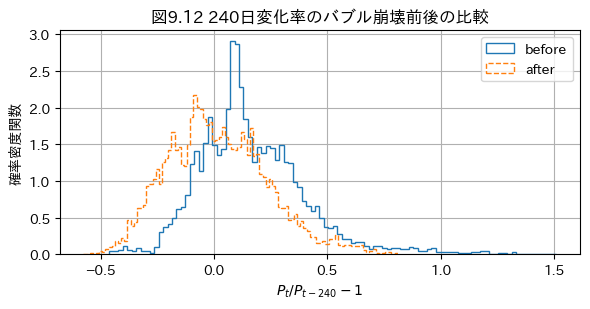

In [19]:
plt.figure(figsize=(6,3.2))
ax5=plt.subplot(1,1,1)
before240tw.hist(ax=ax5,bins=100,density=True,label='before',histtype="step")
after240tw.hist(ax=ax5,bins=100,density=True,label='after',histtype="step",
                linestyle='--')
plt.xlabel('$P_{t}/P_{t-240}-1$')
plt.ylabel('確率密度関数')
plt.legend()
plt.title("図9.12 240日変化率のバブル崩壊前後の比較")
plt.tight_layout()
#plt.savefig("0912.jpeg",dpi=600)
plt.show()

In [20]:
def scatter_autocorr(tsd,shift_days,title1,title2):
    fig = plt.figure(figsize=(5,2.5))
    ax1=fig.add_subplot(1,2,1)
    plt.scatter(tsd,tsd.shift(shift_days),color='gray',alpha=0.05)
    max_r,min_r=abs(max(tsd.iloc[:,0])),abs(min(tsd.iloc[:,0]))
    max_tick=int(max(max_r,min_r)*100)/100
    plt.xticks([-max_tick,0,max_tick])
    plt.xticks(rotation=90)
    plt.yticks([-max_tick,0,max_tick])
    plt.title(title1)
    plt.xlabel("$P_{t}/P_{t-1}-1$")
    plt.ylabel("$P_{t-1}/P_{t-2}-1$")
    plt.hlines([0],-0.1,0.1)
    plt.vlines([0],-0.1,0.1)
    ax2=fig.add_subplot(1,2,2)
    fig=sm.graphics.tsa.plot_acf(tsd.squeeze(), lags=shift_days*5,ax=ax2,
                                 color='gray')
    plt.title(title2)
    plt.xlabel('次数')    
    plt.ylabel('自己相関係数')
    plt.tight_layout()
    #plt.savefig(title1[:5]+'.jpeg',dpi=600)
    plt.show()

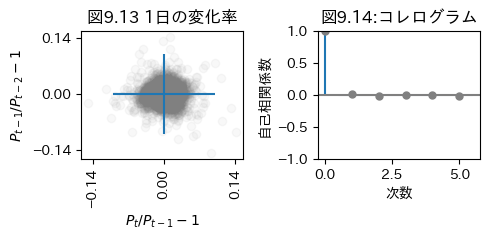

In [21]:
scatter_autocorr(rn225,1,"図9.13 1日の変化率", "図9.14:コレログラム")

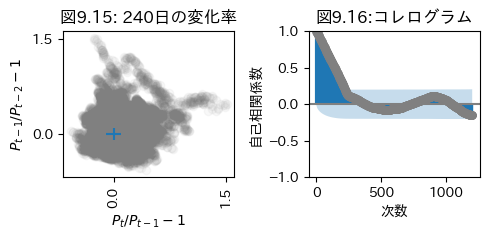

In [22]:
scatter_autocorr(r240n225,240,"図9.15: 240日の変化率","図9.16:コレログラム")

In [23]:
def scatter_scatter(tsd1,tsd2,shift_days,title1,title2):
    plt.figure(figsize=(6,3))
    plt.subplot(121)
    plt.scatter(tsd1,tsd1.shift(shift_days),color='gray',alpha=0.05)
    max_r,min_r=abs(max(tsd1.iloc[:,0])),abs(min(tsd1.iloc[:,0]))
    max_tick=max(max_r,min_r)
    max_r,min_r=abs(max(tsd2.iloc[:,0])),abs(min(tsd2.iloc[:,0]))
    max_tick=int(max(max_tick,max_r,min_r)*100)/100
    plt.xticks([-max_tick,0,max_tick])
    plt.xticks(rotation=90)
    plt.yticks([-max_tick,0,max_tick])
    plt.title(title1)
    plt.xlabel('$P_{t}/P_{t-1}-1$')
    plt.ylabel('$P_{t-1}/P_{t-2}-1$')
    plt.subplot(122)
    plt.scatter(tsd2,tsd2.shift(shift_days),color='seagreen',alpha=0.05)
    plt.xticks([-max_tick,0,max_tick])
    plt.xticks(rotation=90)
    plt.yticks([-max_tick,0,max_tick])
    plt.title(title2)
    plt.xlabel('$P_{t}/P_{t-1}-1$')
    plt.ylabel('$P_{t-1}/P_{t-2}-1$')
    plt.tight_layout() 
    #plt.savefig(title1[:5]+".jpeg",dpi=600)
    plt.show()

    plt.savefig(title1[:5]+".jpeg",dpi=600)

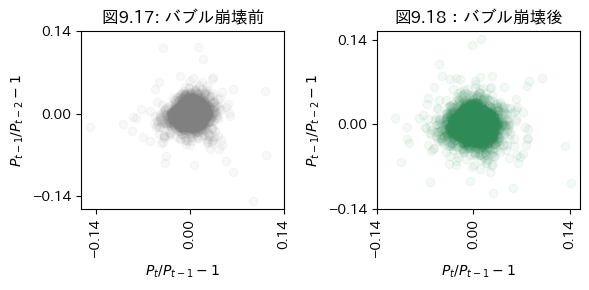

In [24]:
scatter_scatter(before,after,1,"図9.17: バブル崩壊前","図9.18：バブル崩壊後")

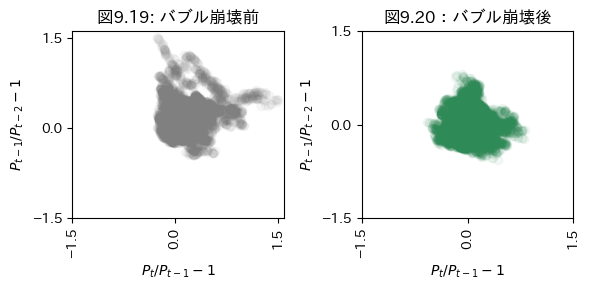

In [25]:
scatter_scatter(before240tw,after240tw,240,"図9.19: バブル崩壊前",
                "図9.20：バブル崩壊後")

In [26]:
def time_window_analysis(tsd, title, xlabel):
    plt.figure(figsize=(4,2.5))

    # tsd が DataFrame のときは 1 列目だけ取り出して Series にする
    if isinstance(tsd, pd.DataFrame):
        s = tsd.iloc[:, 0]
    else:
        s = tsd

    horizon = 240
    high  = np.zeros(horizon)
    q075  = np.zeros(horizon)
    ave   = np.zeros(horizon)
    q025  = np.zeros(horizon)
    low   = np.zeros(horizon)

    # period=0 は pct_change(0) で全部 NaN になるので、1 からにしています
    for i in range(1, horizon):
        rtsd = s.pct_change(i).dropna()
        high[i] = rtsd.max()
        q075[i] = rtsd.quantile(0.75)
        ave[i]  = rtsd.mean()
        q025[i] = rtsd.quantile(0.25)
        low[i]  = rtsd.min()

    plt.plot(high, label="最大値", linestyle=':')
    plt.plot(q075, label="3四分位", linestyle=':')
    plt.plot(ave,  label="平均")
    plt.plot(q025, label="1四分位", linestyle=':')
    plt.plot(low,  label="最小値", linestyle='--')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('$P_{t}/P_{1}-1$')
    plt.tight_layout()
    plt.show()

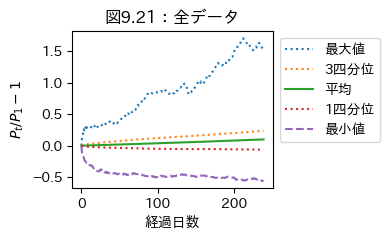

In [27]:
time_window_analysis(n225,"図9.21：全データ","経過日数")

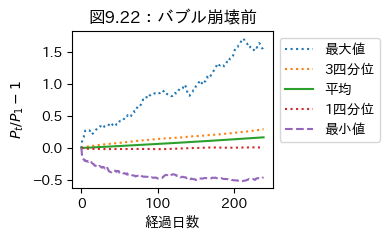

In [28]:
time_window_analysis(n225.loc[:'1989/12/31'],"図9.22：バブル崩壊前","経過日数")

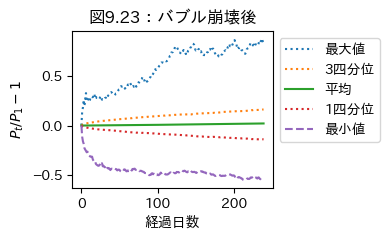

In [29]:
time_window_analysis(n225.loc['1990/1/1':],"図9.23：バブル崩壊後","経過日数")

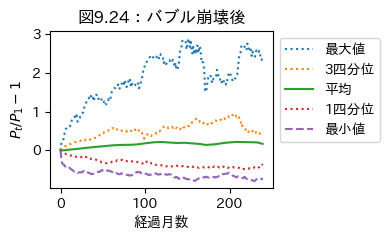

In [30]:
time_window_analysis((n225.resample('ME').last()).loc['1990/1/1':],
                     "図9.24：バブル崩壊後","経過月数")

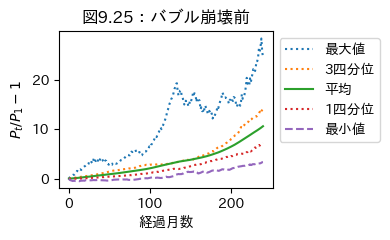

In [31]:
time_window_analysis(n225.resample('ME').last().loc[:'1989/12/31'],
                     "図9.25：バブル崩壊前","経過月数")